In [26]:
import math
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
#tsa为Time Series analysis缩写
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")
#画图
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

def ts_plot(data, lags=None,title=''):
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    #matplotlib官方提供了五种不同的图形风格，
    #包括bmh、ggplot、dark_background、
    #fivethirtyeight和grayscale
    with plt.style.context('ggplot'):
        fig = plt.figure(figsize=(10, 8))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0))
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        data.plot(ax=ts_ax)
        ts_ax.set_title(title+'时序图')
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5)

        acf_ax.set_title('自相关系数')
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5)

        pacf_ax.set_title('偏自相关系数')
        sm.qqplot(data, line='s', ax=qq_ax)

        qq_ax.set_title('QQ 图')
        scs.probplot(data, sparams=(data.mean(), data.std()), plot=pp_ax)

        pp_ax.set_title('PP 图')
        plt.tight_layout()

    return





In [4]:
# 数据量>=5的城市名单 共101个
above5 = ['镇江', '杭州', '徐州', '潍坊', '西宁', '嘉兴', '保定', '许昌', '柳州', '株洲', 
          '广州', '东莞', '铜陵', '南阳', '桂林', '包头', '龙岩', '重庆', '哈尔滨', '淄博', 
          '洛阳', '荆门', '兰州', '温州', '湖州', '常州', '绵阳', '石家庄', '银川', '南宁', 
          '衢州', '滨州', '鞍山', '德州', '无锡', '南通', '襄阳', '武汉', '长沙', '大连', 
          '梅州', '沈阳', '乐山', '西安', '南昌', '惠州', '连云港', '福州', '北京', '德阳', 
          '济宁', '郑州', '珠海', '乌鲁木齐', '岳阳', '呼和浩特', '宁波', '拉萨', '赣州', '新乡',
          '天津', '江门', '南京', '长春', '吉林', '济南', '汕头', '太原', '海口', '台州',
          '宝鸡', '青岛', '威海', '昆明', '贵阳', '上海', '益阳', '深圳', '揭阳', '滁州', 
          '绍兴', '唐山', '合肥', '厦门', '苏州', '焦作', '金华', '泉州', '泰州', '衡阳', 
          '漳州', '成都', '芜湖', '扬州', '盐城', '佛山', '烟台', '潮州', '宿迁', '肇庆', 
          '宜昌']

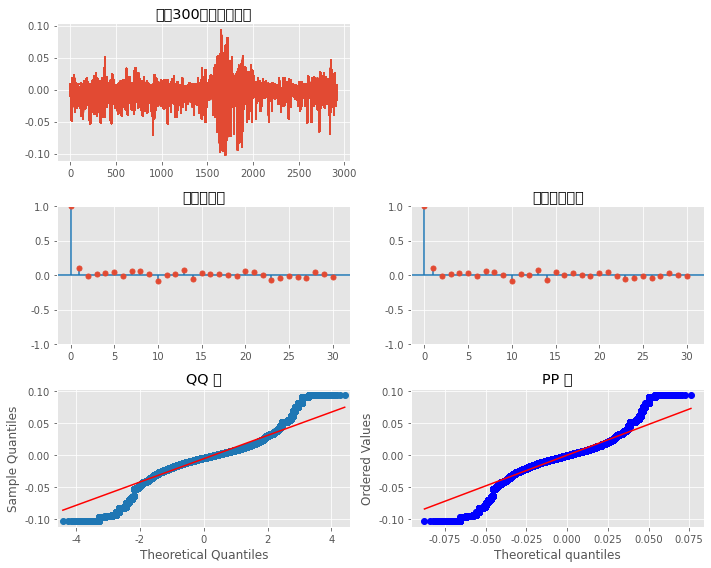

In [15]:
dataDf = pd.DataFrame()
sourcePath = '/Users/rumeng/Downloads/qingzang/trainSet2/data/'
bigv_ds = []
for city in above5:
    bigv_ds.append(pd.read_csv(sourcePath+city+'.csv',on_bad_lines='skip',encoding='utf-8-sig',engine='python'))
dataDf = pd.concat(bigv_ds)
retDf = dataDf[['ret']]
retDf = retDf[retDf!=-100].dropna()

ts_plot(retDf.ret,lags=30,title='沪深300收益率')

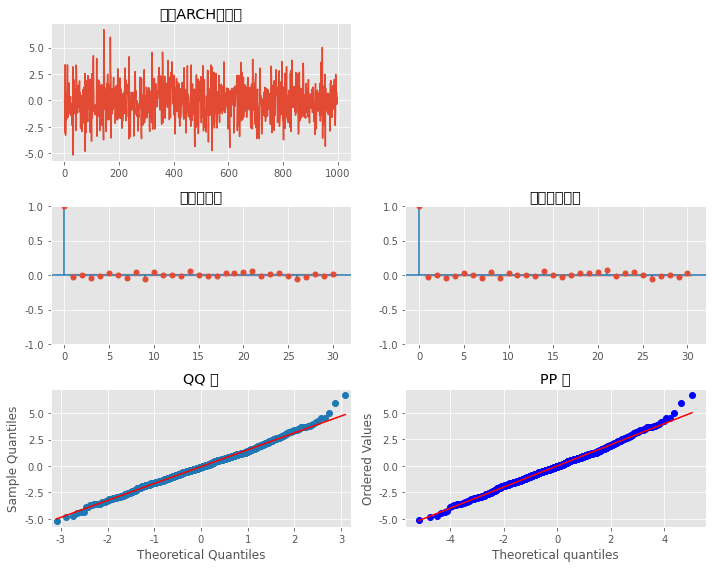

In [9]:
# 模拟ARCH时间序列
np.random.seed(2)
a0 = 2
a1 = .5
y = w = np.random.normal(size=1000)
Y = np.empty_like(y)
for t in range(1,len(y)):
    Y[t] = w[t] * np.sqrt((a0 + a1*y[t-1]**2))
ts_plot(Y, lags=30,title='模拟ARCH')

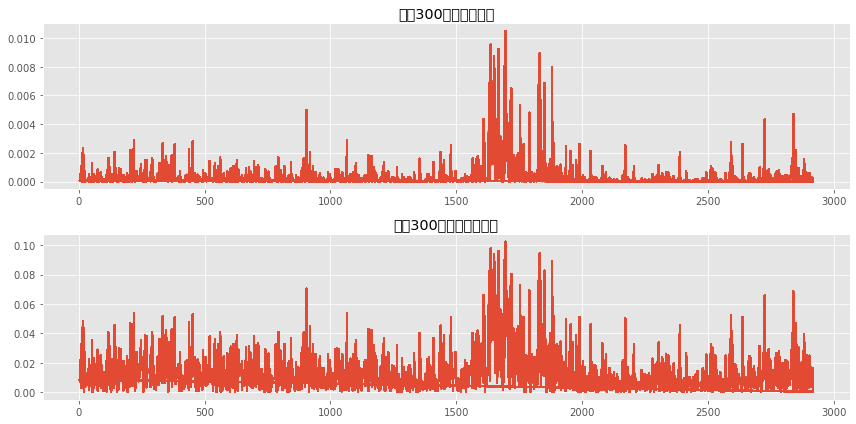

In [16]:
def ret_plot(ts, title=''):
    ts1=ts**2
    ts2=np.abs(ts)
    with plt.style.context('ggplot'):
        fig = plt.figure(figsize=(12, 6))
        layout = (2, 1)
        ts1_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        ts2_ax = plt.subplot2grid(layout, (1, 0))
        ts1.plot(ax=ts1_ax)
        ts1_ax.set_title(title+'日收益率平方')
        ts2.plot(ax=ts2_ax)
        ts2_ax.set_title(title+'日收益率绝对值')
        plt.tight_layout()
    return

ret_plot(retDf.ret, title='沪深300')

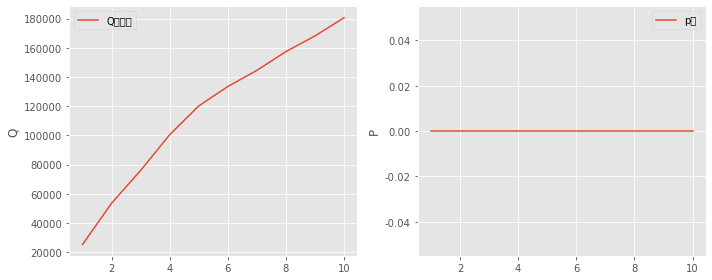

In [22]:
def whitenoise_test(ts):
    '''计算box pierce 和 box ljung统计量'''
    from statsmodels.stats.diagnostic import acorr_ljungbox
    ljungbox_result = acorr_ljungbox(ts)
#     print(ljungbox_result)
    q = pd.Series(ljungbox_result['lb_stat'])
    p = pd.Series(ljungbox_result['lb_pvalue'])
#     print(ljungbox_result['lb_stat'])
#     q,p=acorr_ljungbox(ts)
#     print('q: ',q)
#     print('p: ',p)
    with plt.style.context('ggplot'):
        fig = plt.figure(figsize=(10, 4))
        axes = fig.subplots(1,2)
        axes[0].plot(q, label='Q统计量')
        axes[0].set_ylabel('Q')
        axes[1].plot(p, label='p值')
        axes[1].set_ylabel('P')
        axes[0].legend()
        axes[1].legend()
        plt.tight_layout()
    return

ret = retDf.ret
# print(ret)
whitenoise_test(ret**2)
# print(ret**2)

In [37]:
variableList = ['MarCap', 'ret(-1)','ris','smb','hml']
# variableList = []
myList = ['snow', 'rain', 'cloud', 'max', 'min', 
          'wind',  'prec', 'pres', 'tempDiff1', 'tempDiff7',
          'API', 'AQI']
# myList = ['snow']
label = 'tur'
for i in myList:
    print(i)
    exam_df = dataDf[[i]+variableList+[label]]
    exam_df = exam_df[exam_df!=-100].dropna()
    if len(exam_df)==0:
        print('len==0')
        break
    if 'MarCap' in variableList:
        exam_df['MarCap'] = exam_df['MarCap'].apply(lambda x : math.log(x))
    if i =='tempDiff7':
        exam_df['tempDiff7'] = exam_df['tempDiff7'].apply(lambda x : abs(x))
    exam_df=exam_df.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
    if exam_df[i].isnull().sum()!=0:
        print(i,'has no change')
        break

    print(len(exam_df))
    exam_X=exam_df[[i]+variableList]
    exam_Y=exam_df[label]
#     print(exam_Y)
#     Y=ret*100.0

    am = arch_model(exam_Y, exam_X, p=1, o=1, q=1, dist='StudentsT')

    res = am.fit(update_freq=0)

    #update_freq=0表示不输出中间结果，只输出最终结果
    vol=np.sqrt(res.params[1]/(1-res.params[2]-res.params[3]))
    print(vol)
    print(res.summary())

snow
194879
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 14424008.51043935
            Iterations: 17
            Function evaluations: 141
            Gradient evaluations: 13
0.1252222621816192


/Users/rumeng/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                          tur   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:           -1.44240e+07
Distribution:      Standardized Student's t   AIC:                       2.88480e+07
Method:                  Maximum Likelihood   BIC:                       2.88481e+07
                                              No. Observations:               194879
Date:                      Tue, Jul 19 2022   Df Residuals:                   194878
Time:                              02:14:56   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

/Users/rumeng/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                          tur   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:           -1.44240e+07
Distribution:      Standardized Student's t   AIC:                       2.88480e+07
Method:                  Maximum Likelihood   BIC:                       2.88481e+07
                                              No. Observations:               194879
Date:                      Tue, Jul 19 2022   Df Residuals:                   194878
Time:                              02:14:59   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

/Users/rumeng/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                          tur   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:           -1.44240e+07
Distribution:      Standardized Student's t   AIC:                       2.88480e+07
Method:                  Maximum Likelihood   BIC:                       2.88481e+07
                                              No. Observations:               194879
Date:                      Tue, Jul 19 2022   Df Residuals:                   194878
Time:                              02:15:02   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

Optimization terminated successfully    (Exit mode 0)
            Current function value: 25793926.690739896
            Iterations: 14
            Function evaluations: 106
            Gradient evaluations: 10
0.0234846429125505
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                          tur   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:           -2.57939e+07
Distribution:      Standardized Student's t   AIC:                       5.15879e+07
Method:                  Maximum Likelihood   BIC:                       5.15879e+07
                                              No. Observations:               196126
Date:                      Tue, Jul 19 2022   Df Residuals:                   196125
Time:                              02:15:13   Df Model:                            1
     

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 79523.81978333702
            Iterations: 22
            Function evaluations: 178
            Gradient evaluations: 18
0.5492670569797393


/Users/rumeng/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                          tur   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -79523.8
Distribution:      Standardized Student's t   AIC:                           159060.
Method:                  Maximum Likelihood   BIC:                           159118.
                                              No. Observations:               118692
Date:                      Tue, Jul 19 2022   Df Residuals:                   118691
Time:                              02:15:24   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0

In [ ]:
vol=np.sqrt(result1.params[1]/(1-result1.params[2]-result1.params[3]))
vol